# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [88]:
%matplotlib inline
import pandas as pd
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

In [90]:
from IPython.core.display import HTML
HTML('<style>{}</style>'.format( open('style.css').read() ) )

## imports for Python, Pandas

In [72]:
import json
from pandas.io.json import json_normalize

In [73]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + '[{}]'.format(i))
                i += 1
        else:
            out[name] = x

    flatten(y)
    return out

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [74]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [75]:
[flatten_json(record) for record in data]

[{'counties[0]name': 'Dade',
  'counties[0]population': 12345,
  'counties[1]name': 'Broward',
  'counties[1]population': 40000,
  'counties[2]name': 'Palm Beach',
  'counties[2]population': 60000,
  'infogovernor': 'Rick Scott',
  'shortname': 'FL',
  'state': 'Florida'},
 {'counties[0]name': 'Summit',
  'counties[0]population': 1234,
  'counties[1]name': 'Cuyahoga',
  'counties[1]population': 1337,
  'infogovernor': 'John Kasich',
  'shortname': 'OH',
  'state': 'Ohio'}]

In [76]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [77]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,shortname,state
0,Dade,12345,Rick Scott,FL,Florida
1,Broward,40000,Rick Scott,FL,Florida
2,Palm Beach,60000,Rick Scott,FL,Florida
3,Summit,1234,John Kasich,OH,Ohio
4,Cuyahoga,1337,John Kasich,OH,Ohio


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [78]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [79]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [80]:
relevant_columns = {
'countrycode': 'Country Code',
'countryname': 'Country Name',
'countryshortname':'Country Short Name',
'id': 'ID',
'project_name':'Project Name',
'sectorcode':'Sector Code',
'source':'Source',
'status':'Status'
}

In [113]:
file_path = 'data/world_bank_projects.json'
data = json.loads(open(json_file).read())
df = json_normalize(data)[list(relevant_columns.keys())]
df = df.set_index('id')
df.head()

,status,project_name,countrycode,source,countryshortname,sectorcode,countryname
id,,,,,,,
P129828,Active,Ethiopia General Education Quality Improvement...,ET,IBRD,Ethiopia,"ET,BS,ES,EP",Federal Democratic Republic of Ethiopia
P144674,Active,TN: DTF Social Protection Reforms Support,TN,IBRD,Tunisia,"BZ,BS",Republic of Tunisia
P145310,Active,Tuvalu Aviation Investment Project - Additiona...,TV,IBRD,Tuvalu,TI,Tuvalu
P144665,Active,Gov't and Civil Society Organization Partnership,RY,IBRD,"Yemen, Republic of",JB,Republic of Yemen
P144933,Active,Second Private Sector Competitiveness and Econ...,LS,IBRD,Lesotho,"FH,YW,YZ",Kingdom of Lesotho


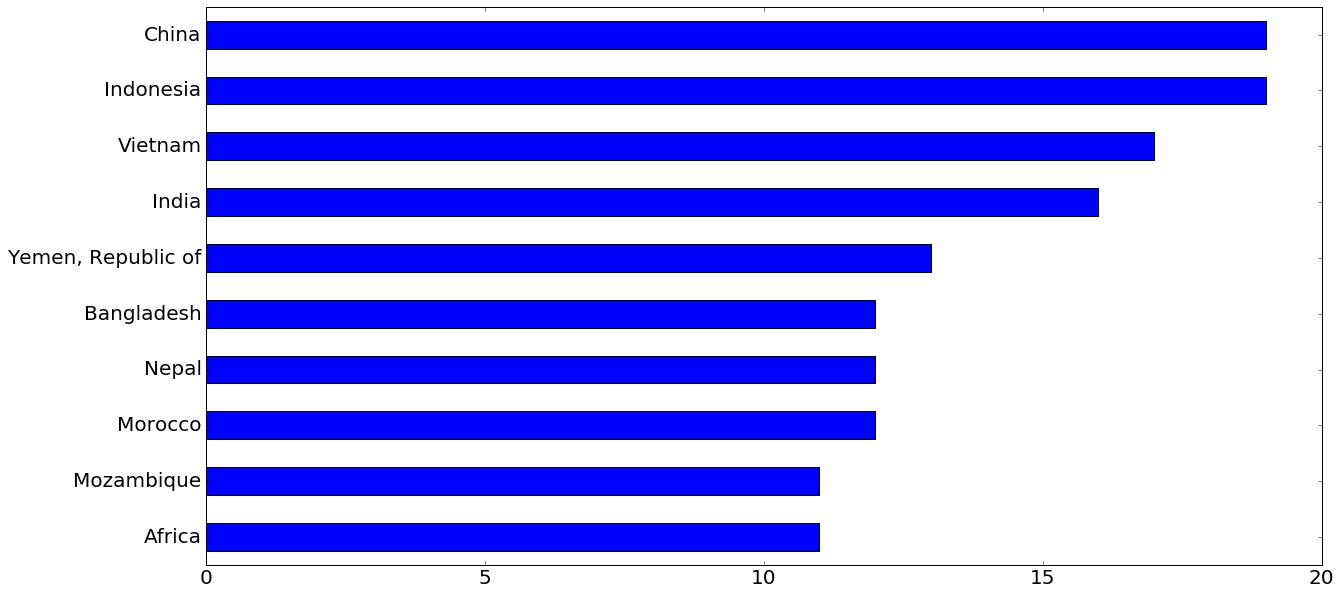

In [120]:
df.countryshortname.value_counts()[:10].sort_values().plot.barh(fontsize=20)

In [194]:
themes = json_normalize(data, 'mjtheme_namecode', list(relevant_columns.keys()))
themes = themes.rename(columns={'code':'theme_code','name':'theme_name'})
code_map = themes[themes.theme_name!=''][['theme_name','theme_code']].drop_duplicates()
themes['theme_name'] = themes.theme_code.apply(lambda c: code_map[code_map.theme_code == c].theme_name.values[0])
themes = themes.set_index('theme_code')
themes.head()

,theme_name,status,countrycode,source,id,project_name,sectorcode,countryshortname,countryname
theme_code,,,,,,,,,
8,Human development,Active,ET,IBRD,P129828,Ethiopia General Education Quality Improvement...,"ET,BS,ES,EP",Ethiopia,Federal Democratic Republic of Ethiopia
11,Environment and natural resources management,Active,ET,IBRD,P129828,Ethiopia General Education Quality Improvement...,"ET,BS,ES,EP",Ethiopia,Federal Democratic Republic of Ethiopia
1,Economic management,Active,TN,IBRD,P144674,TN: DTF Social Protection Reforms Support,"BZ,BS",Tunisia,Republic of Tunisia
6,Social protection and risk management,Active,TN,IBRD,P144674,TN: DTF Social Protection Reforms Support,"BZ,BS",Tunisia,Republic of Tunisia
5,Trade and integration,Active,TV,IBRD,P145310,Tuvalu Aviation Investment Project - Additiona...,TI,Tuvalu,Tuvalu


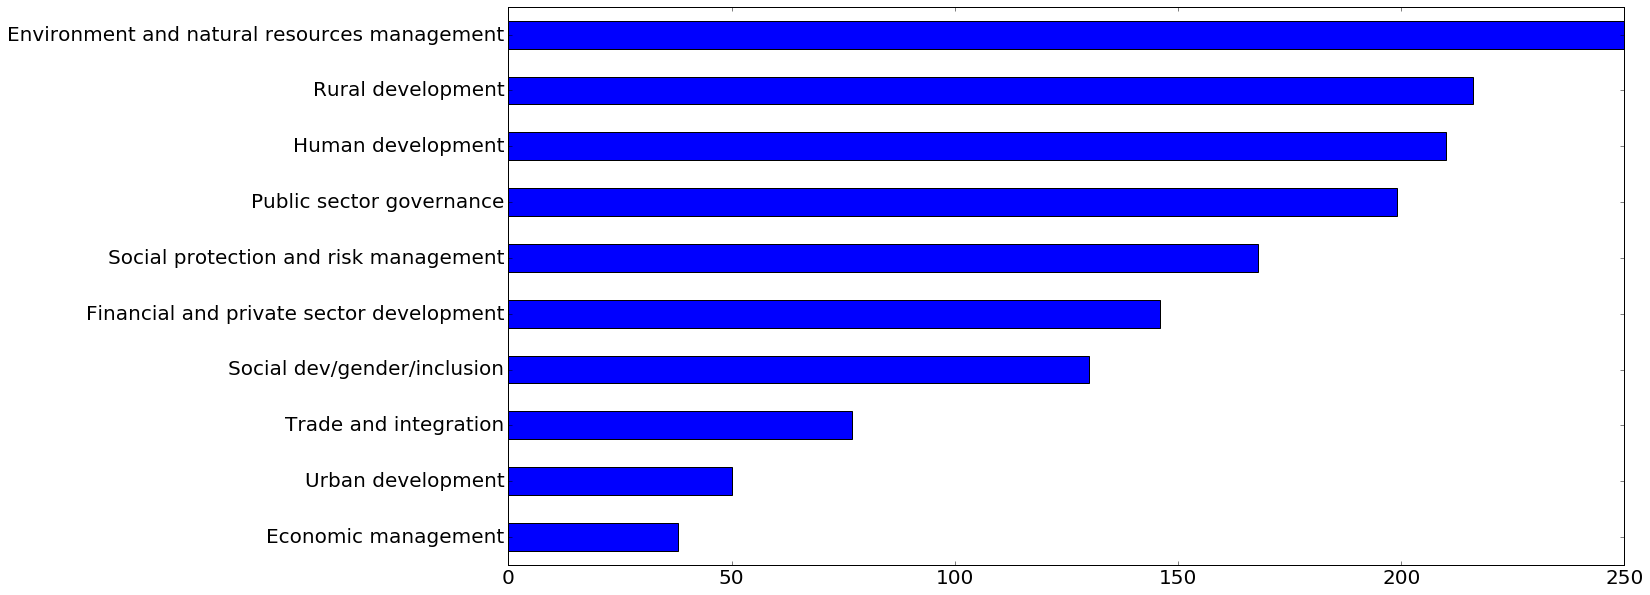

In [195]:
themes.theme_name.value_counts()[:10].sort_values().plot.barh(fontsize=20)

In [ ]:
!git add .
!git commit -m ''